# 7.4.5b Análisis de componentes principales (PCA)


Sea $\mathbf{X}\in\mathbb{R}^{N\times D}$ una matriz de $N$ datos $D$-dimensionales. 

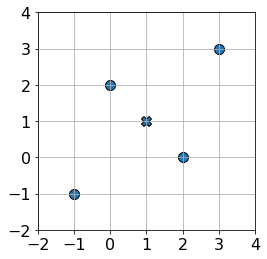

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
m = np.mean(X, axis=0)
fig, ax = plt.subplots(); ax.set_aspect("equal"); plt.grid(True)
plt.axis([-2, 4, -2, 4]); plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.scatter(m[0], m[1], facecolor='C0', edgecolor='k', s=100, marker="X")
plt.scatter(X[:,0], X[:,1], facecolor='C0', edgecolor='k', s=100);

**Descomposición propia de $\mathbf{\Sigma}$ ordenada ($\lambda\text{s}$ de mayor a menor):** $\;\mathbf{\Sigma}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^t$, $\mathbf{\Lambda}=\operatorname{diag}(\lambda_1,\dotsc,\lambda_n)$, $\lambda_1\geq\lambda_2\geq\cdots\geq\lambda_D$
* $\boldsymbol{u}_1$ es una dirección de proyección óptima para maximizar la varianza de los datos proyectados, siendo $\lambda_1$ dicha varianza
* Entre todas las direcciones ortonormales a $\boldsymbol{u}_1$, $\boldsymbol{u}_2$ y $\lambda_2$ son dirección óptima de proyección y varianza correspondiente
* Y así, sucesivamente, hasta $\boldsymbol{u}_D$ y $\lambda_D$

**Principal component analysis (PCA):** $\;$ técnica de **reducción de la dimensión** que proyecta linealmente los datos en el subespacio lineal generado por los $K$ **componentes principales,** esto es, los $K$ vectores propios asociados a los $K$ mayores valores propios de $\mathbf{\Sigma}$
$$\operatorname{PCA}(\mathbf{X})=(\mathbf{X}-\mathbf{1}_N\boldsymbol{\mu}^t)\mathbf{U}_K%
\quad\text{con}\quad\mathbf{U}_K=(\boldsymbol{u}_1, \dotsc, \boldsymbol{u}_K)$$
* El centrado previo de los datos no es estrictamente necesario, aunque por lo general sí se hace
* Los datos originales pueden "reconstruirse" con $\,\tilde{\mathbf{X}}=\operatorname{PCA}(\mathbf{X})\mathbf{U}_K^t+\mathbf{1}_N\boldsymbol{\mu}^t$

**Elección de $K$:** $\;$ si se tiene $\mathbf{\Lambda}$, puede escogerse el menor $K$ que explique un cierto porcentaje (p.e. $90\%$) de la varianza total al menos
$$q_K=\frac{1}{\operatorname{tr}(\mathbf{\Sigma})}\sum_{k=1}^K\lambda_k%
\quad\text{con}\quad%
\operatorname{tr}(\mathbf{\Sigma})=\sum_{d=1}^D\lambda_d$$

En aprendizaje automático es usual encontrarnos con datos de dimensión muy elevada que, afortunadamente, puede reducirse drásticamente a cambio de reducir un poco la varianza total explicada. Por ejemplo, en clasificación de imágenes, muchas variables corresponden a píxeles que varían muy poco o nada ($\lambda$ prácticamente nulo), por lo que pueden ignorarse sin efectos negativos significativos; al contrario, la reducción de la dimensión suele facilitar el desarrollo de sistemas precisos.

In [5]:
import numpy as np
X = np.array([ [-1, -1], [0, 2], [2, 0], [3, 3] ]).astype(float)
m = np.mean(X, axis=0)
S = np.cov(X.T, bias=True)
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
Xr = (X - m) @ U[:,0]
print("Datos centrados:\n", X - m, "\nComponente principal 1:\n", U[:,0], "\nDatos reducidos:\n", Xr)
q1 = La[0]
print("Varianza explicada: ", q1, "\nCalidad de la proyección (%): ", 100.0 * q1/np.sum(La))

Datos centrados:
 [[-2. -2.]
 [-1.  1.]
 [ 1. -1.]
 [ 2.  2.]] 
Componente principal 1:
 [0.70710678 0.70710678] 
Datos reducidos:
 [-2.82842712  0.          0.          2.82842712]
Varianza explicada:  4.0 
Calidad de la proyección (%):  80.0


**Blanqueado PCA:** $\;$ PCA con $K=D$ y postnormalización de varianzas con $\mathbf{\Lambda}^{-1/2}$
